<a href="https://colab.research.google.com/github/feuerteufelfw/SOC/blob/main/Lab02_MNIST_ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Versuchsvorbereitung 02 - Bildklassifikation mit Neuronalen Netzen

##Import der notwendigen Bibliotheken



In [178]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

##Laden und Transformieren des MNIST-Datensatzes

In [179]:
#verwende MNIST-Modul aus keras
mnist = tf.keras.datasets.cifar10

# lade Datensatz bestehend aus (Trainingspaare), (Testpaare)
(x_train, y_train), (x_test, y_test) = mnist.load_data()


##Vorverarbeitung

Normalisierung der Pixelwerte, d.h. Transformation der Grauwerte (0...255) auf das Intervall [0..1]

In [180]:

# Normalisiere die Bilder auf das Intervall  [0, 1]
x_train  = x_train / 255.0
x_test = x_test / 255.0

Bild anzeigen

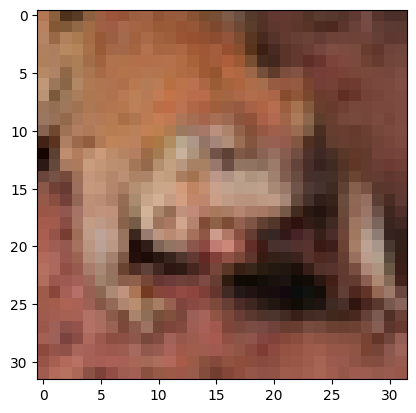

[6]


In [181]:
example = x_test[5]
plt.imshow(example)
plt.show()
print(str(y_test[5]))

Filtern der Labels

In [182]:
y_train, y_test = np.squeeze(y_train), np.squeeze(y_test)
class_car, class_plane = 1,0
train_mask = (y_train == class_car) | (y_train == class_plane)
test_mask = (y_test == class_car) | (y_test == class_plane)
y_train = y_train[train_mask]
y_test = y_test[test_mask]
x_train = x_train[train_mask]
x_test = x_test[test_mask]

Umrechnung der Labels in Vektordarstellung (Hot-Vektor-Encoding)

In [183]:
#Umrechnung der Labels in Vektordarstellung (Hot-Vektor-Encoding)
total_classes = 2
train_vec_labels = keras.utils.to_categorical(y_train, total_classes)
test_vec_labels = keras.utils.to_categorical(y_test, total_classes)


##Implementierung des Neuronalen Netzes in TensorFlow

In [184]:
#Verwendung des Sequential()-Models
#baue das Modell als linearer Stapel von Schichten
model = Sequential([
 Flatten(input_shape=(32,32, 3)),
 Dense(500, activation='tanh'),
 Dense(250, activation='softmax'),
 Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##Ausgabe der Modellstruktur- und parameter

In [185]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 500)            │     1,536,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 2)              │           502 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,252 (6.34 MB)

 Trainable params: 1,662,252 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

##Konfiguration und Kompilieren des Modells

In [186]:
opt = keras.optimizers.SGD(
      learning_rate=0.01,
      weight_decay=1e-6,
      momentum=0.9)
model.compile(optimizer=opt,
              #loss='mean_squared_error',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, train_vec_labels, validation_data=(x_test, test_vec_labels), epochs=15, batch_size=32, verbose=True)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5807 - loss: 0.6692 - val_accuracy: 0.8145 - val_loss: 0.4778
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7849 - loss: 0.4889 - val_accuracy: 0.8185 - val_loss: 0.4333
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8048 - loss: 0.4459 - val_accuracy: 0.8365 - val_loss: 0.4011
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8231 - loss: 0.4201 - val_accuracy: 0.8190 - val_loss: 0.4147
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8148 - loss: 0.4255 - val_accuracy: 0.7885 - val_loss: 0.4655
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8364 - loss: 0.3847 - val_accuracy: 0.8255 - val_loss: 0.3986
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8325 - loss: 0.3945 - val_accuracy: 0.8580 - val_loss: 0.3424
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8428 - loss: 0.3651 - val_

In [187]:
eval_loss, eval_accuracy = model.evaluate(x_test, test_vec_labels)
print("Model accuracy: %.2f" % eval_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8749 - loss: 0.3092
Model accuracy: 0.88


##Training des Neuronalen Netzes

1.   List item
2.   List item



In [188]:

model.compile(optimizer="adam",
              #loss='mean_squared_error',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, train_vec_labels, validation_data=(x_test, test_vec_labels), epochs=15, batch_size=32, verbose=True)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8113 - loss: 0.4469 - val_accuracy: 0.8180 - val_loss: 0.3955
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8251 - loss: 0.3965 - val_accuracy: 0.7545 - val_loss: 0.5344
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8217 - loss: 0.4004 - val_accuracy: 0.8360 - val_loss: 0.3803
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8232 - loss: 0.4034 - val_accuracy: 0.8465 - val_loss: 0.3535
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8402 - loss: 0.3764 - val_accuracy: 0.8520 - val_loss: 0.3505
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8388 - loss: 0.3746 - val_accuracy: 0.8535 - val_loss: 0.3546
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8549 - loss: 0.3528 - val_accuracy: 0.8265 - val_loss: 0.3874
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8373 - loss: 0.3701 - val_a

##Evaluierung der Leistungsfähigkeit des Netzes

Überprüfen das Modell zunächst anhand der MNIST Testdaten (10.000 Datensätze) die Genauigkeit unseres Netzes bei „ungesehenen“ Daten (Generalisierungsfähigkeit)



In [189]:
eval_loss, eval_accuracy = model.evaluate(x_test, test_vec_labels)
print("Model accuracy: %.2f" % eval_accuracy)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8518 - loss: 0.3813
Model accuracy: 0.84


##Erstellen eines Plots der `history`-Daten in Matplotlib
Plot des Fehlerverlaufs (Loss) während des Trainings

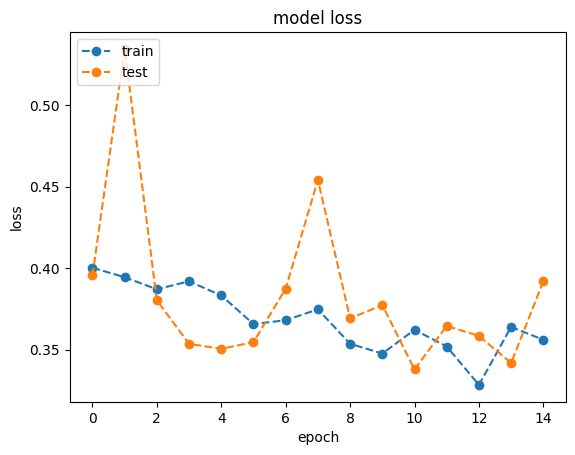

In [190]:
plt.plot(history.history['loss'],'o--')
plt.plot(history.history['val_loss'],'o--')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot der Accuracy des Fehlerverlaufs während des Trainings

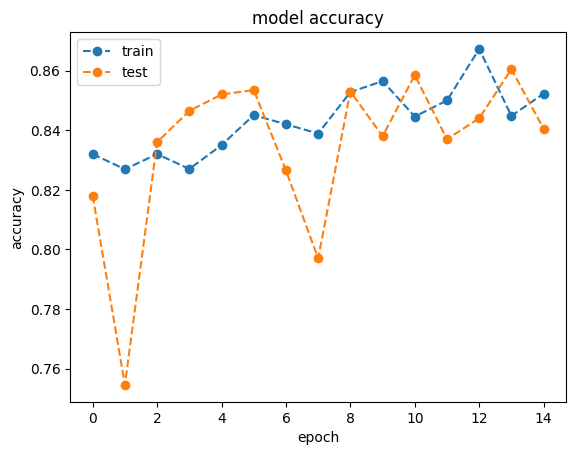

In [191]:
plt.plot(history.history['accuracy'],'o--')
plt.plot(history.history['val_accuracy'],'o--')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Anwendung des NN-Klassifikators anhand konkreter Bilder aus der MNIST-Testmenge (`x_test`)

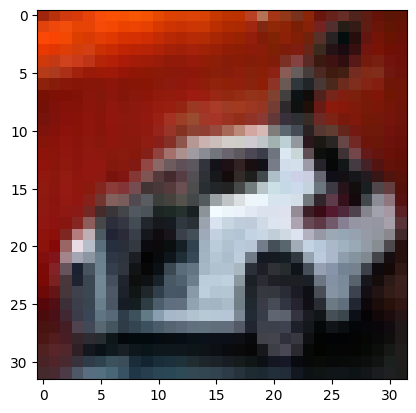

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
predicted class: [1]
true class: 1


In [192]:
i=1
example = x_test[i]
plt.imshow(example, cmap='gray')
plt.show()
prediction=model.predict(np.array([example]))
predicted_class = np.argmax(prediction, axis=-1)
print("predicted class: " + str(predicted_class))
print("true class: "+ str(y_test[i]))


## Evaluierung verrauschter Daten

Die Testbilder werden mit Rauschen versehen.


In [193]:
#Generierung einer Noise-Matrix mittels Zufallszahlen
#die Rauschintensität wird mittel Rauschparameter beta gesteuert
beta=2.0
#Generierung der Noise-Matrix
noise = beta*np.random.random((28,28))-beta/2

#Hinzufügen von Rauschen zu den Bildern
#Addition der Noise-Matrix auf normalisiertes Bild
x_test_noisy = x_test + noise

#x_train_noisy = x_train_norm + noise
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # Clip der Werte zwischen 0 und 1

#Auswertung der Accuracy bei Evaluation der gestörten Daten
eval_loss, eval_accuracy = model.evaluate(x_test_noisy, test_vec_labels)
print("Model accuracy: %.2f" % eval_accuracy)


ValueError: operands could not be broadcast together with shapes (2000,32,32,3) (28,28) 

##Anzeige der verrauschten Daten

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_test_noisy.shape[0], size=25)
images = x_test_noisy[indexes]

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i + 1)
  image = images[i]
  plt.imshow(image, cmap='gray')
  plt.axis('off')

plt.show()

## Evaluierung bei Verschiebungen (Translation) von Bildinhalten

Shift der Bildpixel mittels `roll()`-Funktion in y-Achse (`axis=1`) bzw. x-Achse (`axis=2`):

In [ ]:
# Verschieben der Bilder um 3 Pixel nach rechts und nach unten
x_test_shifted = np.roll(x_test, 1, axis=1)
x_test_shifted = np.roll(x_test_shifted, 1, axis=2)

#Auswertung der Accuracy bei Evaluation der verschobenen Daten
eval_loss, eval_accuracy = model.evaluate(x_test_shifted, test_vec_labels)
print("Model accuracy: %.2f" % eval_accuracy)


##Anwendung des NN-Klassifikators anhand eigener Bilder


eigenes Bild laden und anzeigen

In [ ]:
# Bild laden und anzeigen
img_path = 'TestZiffer3.png'
img = image.load_img(img_path, color_mode='grayscale')
img = img.resize((28,28))
plt.imshow(img, cmap='gray')
plt.show()

##Bildvorverarbeitung und Klassifikation


In [ ]:
#Umwandlung des Bildes als Numpy-Array
input_arr = np.array(img)

#Transformation der Pixelwerte
input_arr = input_arr / 255  #Normalisierung auf Intervall [0,1]

prediction=model.predict(np.array([input_arr]))
predicted_class = np.argmax(prediction, axis=-1)
print("predicted class: " + str(predicted_class))